# Importing required Libraries

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from setuptools._distutils.version import LooseVersion
from pandas_datareader.data import DataReader 
import yfinance as yf
from pandas_datareader import data as pdr

#yf.pdr_override()

# For time stamps
from datetime import datetime

# Data Loading and Exploration

In [5]:
# start time and end time
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [6]:
# Data Scraping from yahoo finance of Reliance stock
Reliance = yf.download('RELIANCE.NS', start=start, end=end)
Reliance

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-16,2551.000000,2582.800049,2551.000000,2575.149902,2566.085449,5101556
2023-08-17,2567.100098,2578.100098,2532.850098,2538.000000,2529.066162,6836872
2023-08-18,2531.250000,2577.600098,2508.550049,2556.800049,2547.800049,9319989
2023-08-21,2539.949951,2555.449951,2515.649902,2520.000000,2520.000000,4610873
2023-08-22,2516.899902,2537.949951,2499.000000,2519.399902,2519.399902,3856522
...,...,...,...,...,...,...
2024-08-08,2915.050049,2930.000000,2891.850098,2898.250000,2898.250000,6193596
2024-08-09,2920.000000,2953.000000,2912.000000,2948.600098,2948.600098,3124888
2024-08-12,2940.000000,2946.000000,2915.500000,2921.250000,2921.250000,4092292


In [7]:
Reliance.shape

(244, 6)

In [8]:
Reliance.describe()

,Open,High,Low,Close,Adj Close,Volume
count,244.000000,244.000000,244.000000,244.000000,244.000000,2.440000e+02
mean,2723.046108,2746.032372,2700.148572,2722.627868,2722.517219,6.106799e+06
std,272.659794,277.960833,267.093200,273.367829,273.437048,2.989532e+06
min,2240.000000,2258.000000,2220.300049,2226.500000,2226.500000,1.927405e+06
25%,2445.337585,2455.362488,2422.624939,2437.424988,2437.424988,4.152868e+06
50%,2845.050049,2874.799927,2817.325073,2845.599976,2845.599976,5.241968e+06
75%,2940.000000,2967.425049,2915.200073,2934.075012,2934.075012,7.247933e+06
max,3208.899902,3217.600098,3171.000000,3201.800049,3201.800049,2.854094e+07


In [9]:
Reliance.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
Reliance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2023-08-16 to 2024-08-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       244 non-null    float64
 1   High       244 non-null    float64
 2   Low        244 non-null    float64
 3   Close      244 non-null    float64
 4   Adj Close  244 non-null    float64
 5   Volume     244 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.3 KB


#  Exploratory Data Analysis (EDA)

## Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

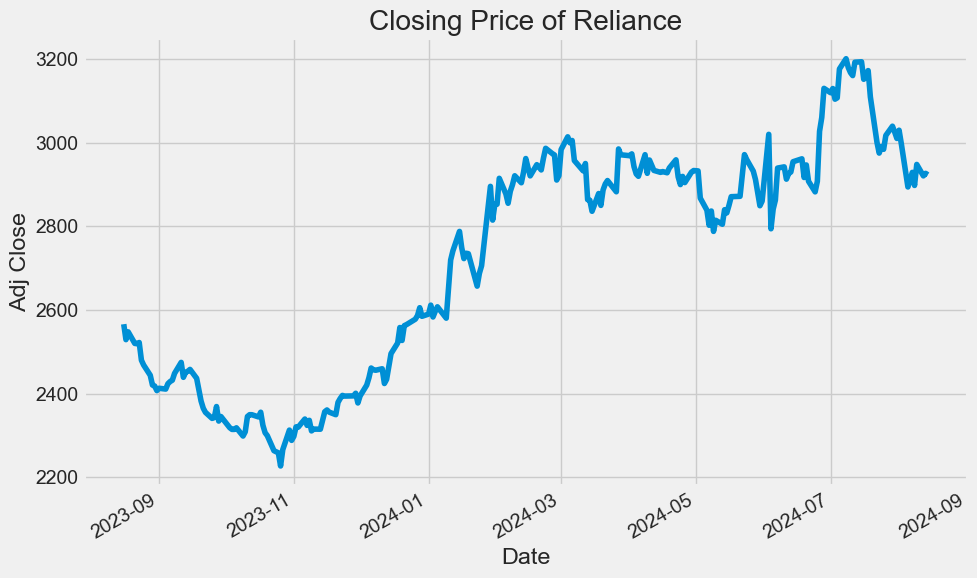

In [11]:
# Let's see a historical view of the closing price for Reliance
plt.figure(figsize=(10, 6))

Reliance['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel('Date')
plt.title("Closing Price of Reliance")

plt.tight_layout()
plt.show()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

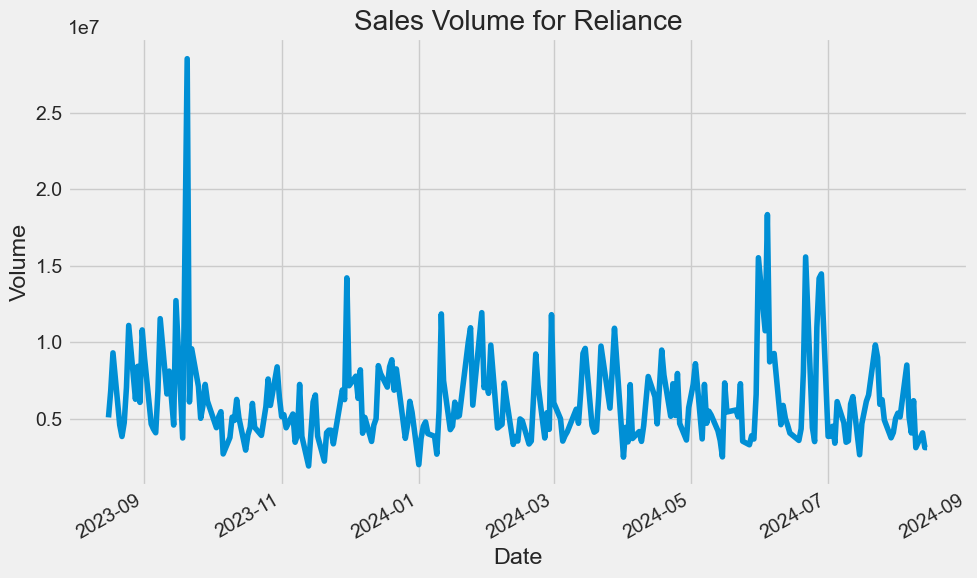

In [12]:
# Now let's plot the total volume of stock being traded each day for Reliance
plt.figure(figsize=(10, 6))

Reliance['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel('Date')
plt.title("Sales Volume for Reliance")

plt.tight_layout()
plt.show()

## Moving average of the  stocks
The average is taken over a specific period of time, like 10 days, 20 days, 30 days, or any time period the trader chooses.

<Figure size 640x480 with 0 Axes>

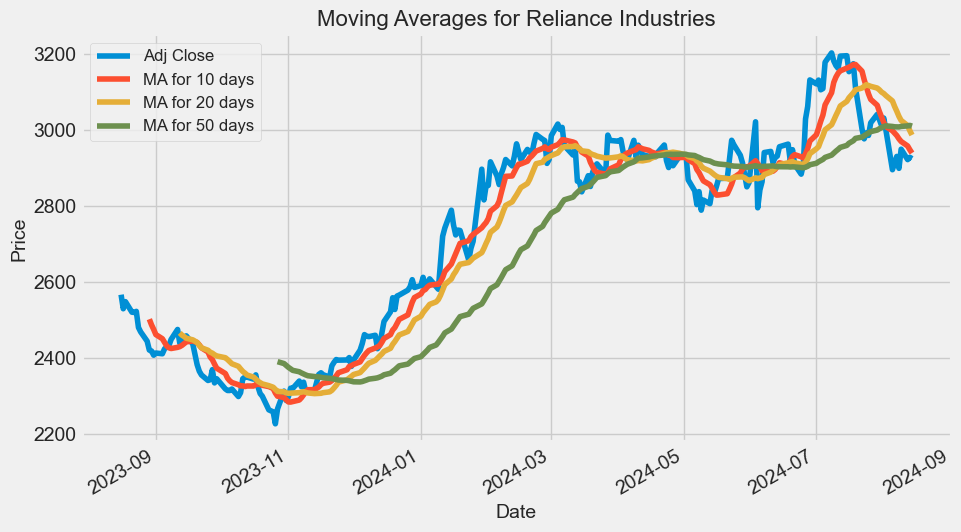

In [13]:
# Calculate moving averages for Reliance
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    Reliance[column_name] = Reliance['Adj Close'].rolling(ma).mean()

# Plot the moving averages for Reliance only with a larger figure size
plt.figure()

Reliance[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(10, 6))
plt.title('Moving Averages for Reliance Industries', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise

## Daily Return

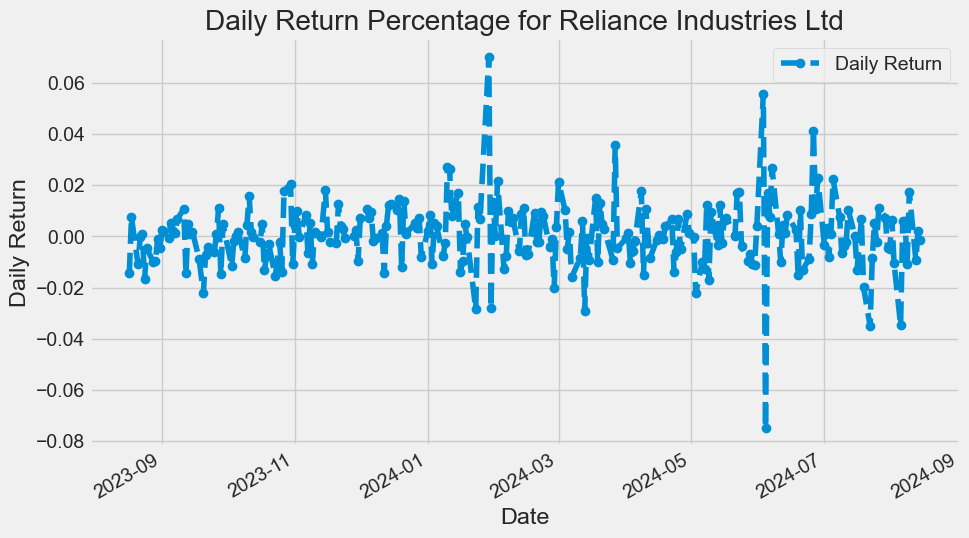

In [14]:
# Use pct_change to find the percent change for each day for Reliance
Reliance['Daily Return'] = Reliance['Adj Close'].pct_change()

# Then plot the daily return percentage for Reliance
plt.figure(figsize=(10, 6))
Reliance['Daily Return'].plot(legend=True, linestyle='--', marker='o')
plt.title('Daily Return Percentage for Reliance Industries Ltd')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

 Average daily return using a histogram. Use seaborn to create both a histogram and kde plot on the same figure.

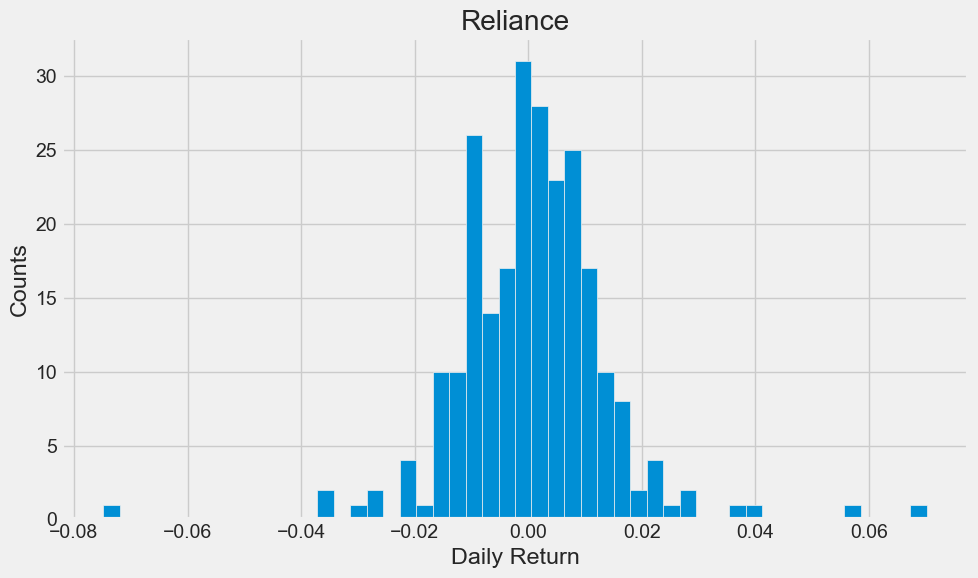

In [15]:
plt.figure(figsize=(10, 6))

# Plot histogram for Reliance
plt.subplot(1, 1, 1)
Reliance['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('Reliance')

plt.tight_layout()
plt.show()

# Model Building

In [16]:
# Get the stock quote
df = yf.download('RELIANCE.NS', start='2022-11-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-01,2399.799072,2399.799072,2314.883301,2335.050781,2326.831299,6981583
2022-11-02,2337.312012,2353.833740,2321.344238,2349.634033,2341.363281,4490948
2022-11-03,2335.050781,2362.463867,2330.620361,2358.402588,2350.101074,3346724
2022-11-04,2357.248779,2399.799072,2354.664551,2393.107422,2384.683594,6287907
2022-11-07,2391.492188,2409.306152,2375.801270,2405.890869,2397.422119,5894874
...,...,...,...,...,...,...
2024-08-08,2915.050049,2930.000000,2891.850098,2898.250000,2898.250000,6193596
2024-08-09,2920.000000,2953.000000,2912.000000,2948.600098,2948.600098,3124888
2024-08-12,2940.000000,2946.000000,2915.500000,2921.250000,2921.250000,4092292


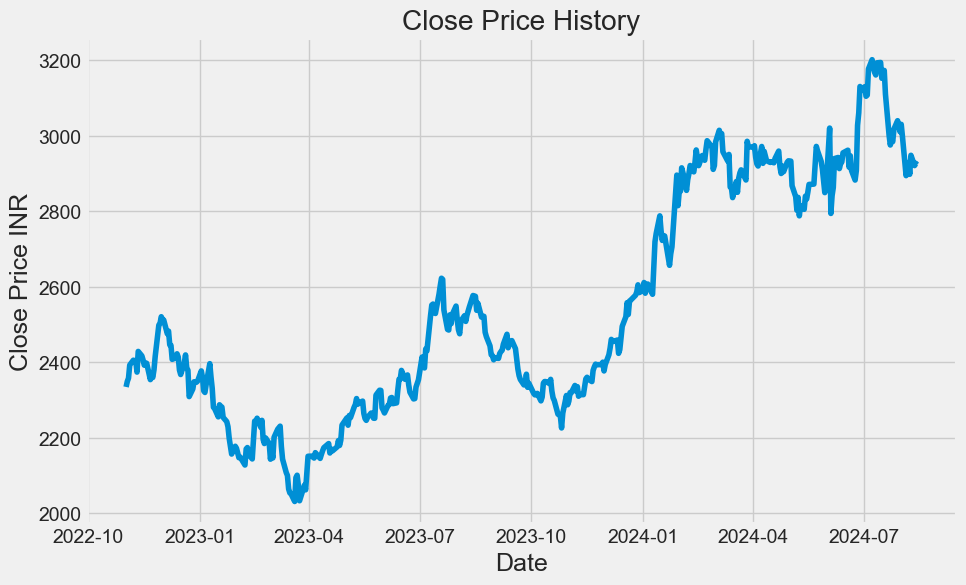

In [17]:
plt.figure(figsize=(10,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [18]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .85 ))

training_data_len

374

## Data Normalization

In [19]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.25921842],
       [0.27168223],
       [0.27917642],
       [0.30883748],
       [0.31976307],
       [0.31771216],
       [0.29286319],
       [0.33964241],
       [0.32958443],
       [0.32031539],
       [0.30852199],
       [0.31380732],
       [0.31270289],
       [0.2758239 ],
       [0.28698611],
       [0.28067522],
       [0.29806965],
       [0.32844056],
       [0.39939833],
       [0.40306635],
       [0.41817304],
       [0.41182271],
       [0.41091546],
       [0.37959786],
       [0.38571157],
       [0.35439396],
       [0.35340784],
       [0.32173531],
       [0.32489065],
       [0.33427821],
       [0.32678402],
       [0.29747789],
       [0.28741991],
       [0.3140045 ],
       [0.33175386],
       [0.30232941],
       [0.29704409],
       [0.23740648],
       [0.25464295],
       [0.27093294],
       [0.27073576],
       [0.26982851],
       [0.27290497],
       [0.29554529],
       [0.28067522],
       [0.2503043 ],
       [0.24675439],
       [0.264

In [20]:
# Create the training data set
# Split the data into x_train and y_train data sets
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

# Iterate over the scaled training data to create x_train and y_train
for i in range(60, len(train_data)):
    x_train.append(scaled_data[i-60:i, 0])  # Use array slicing to select the last 60 days' data
    y_train.append(scaled_data[i, 0])       # Append the target value for the next day

# Convert the lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [22]:
x_train.shape

(314, 60, 1)

## Predicting the Closing Price of stocks

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM


In [24]:
from tensorflow.keras.layers import Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # Add dropout regularization
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))  # Add dropout regularization
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with increased number of epochs
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.1)

Epoch 1/50


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.1277 - val_loss: 0.0052
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0113 - val_loss: 0.0184
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0076 - val_loss: 0.0018
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0056 - val_loss: 0.0044
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0043 - val_loss: 0.0080
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0044 - val_loss: 0.0019
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0036 - val_loss: 0.0019
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0035 - val_loss: 0.0021
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0038 - val_loss: 0.0018
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0035 - val_loss: 0.0059
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0036 - val_loss: 0.0019
Epoch 13/50

In [25]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [26]:
x_test.shape

(66, 60, 1)

In [27]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 455ms/step


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Root Mean Squared Error (RMSE): 66.45923520665785
Mean Absolute Error (MAE): 50.64070268110795


C:\Users\Dell\AppData\Local\Temp\ipykernel_18768\713729676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


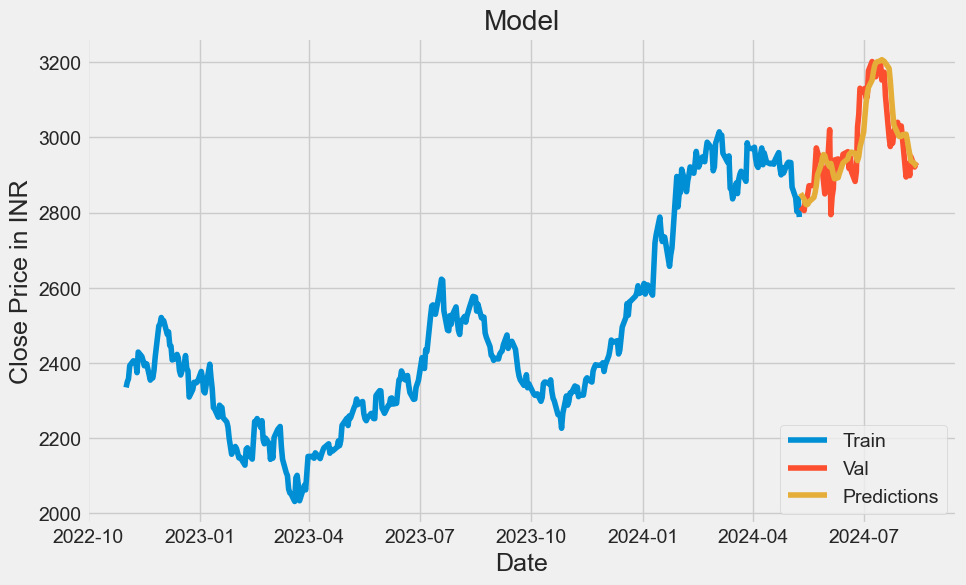

In [29]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(10,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [30]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2024-05-10,2814.850098,2851.249268
2024-05-13,2805.399902,2835.588135
2024-05-14,2840.149902,2823.762695
2024-05-15,2832.550049,2820.912354
2024-05-16,2850.699951,2822.352539
...,...,...
2024-08-08,2898.250000,2955.609863
2024-08-09,2948.600098,2938.100098
2024-08-12,2921.250000,2930.438965
